Derivación numérica.

Por Pablo Angulo y Fabricio Macià para ETSIN@UPM

# Derivación numérica

Vamos a estudiar distintos métodos para aproximar numéricamente el valor de la derivada, o de derivadas de orden superior, de una función $f(x)$ en un punto $x_*$:

$$ f'(x_*),\qquad f''(x_*),\qquad ... $$

**Motivaciones:**

- En ocasiones, no conocemos la expresión analítica de $f$.
- La función $f$ puede tener una expresión conocida; pero demasiado complicada de implementar.
- Estos métodos son pieza esencial de algunos métodos numéricos para resolver Ecuaciones Diferenciales Ordinarias (EDO) o Ecuaciones en Derivadas Parciales (EDP).

## Forma general de los métodos numéricos para calcular la derivada de una función
Los métodos que vamos a presentar se componen de tres ingredientes:

- El punto $x_*$ donde queremos evaluar la derivada de $f(x)$
- $N+1$ *nodos* distintos $x_0,x_1,\dots,x_N$.
- $N+1$ *pesos* $\alpha_0,\alpha_1,\dots,\alpha_N$.

Con ellos aproximamos:

$$f'(x_*)\approx \alpha_0 f(x_0)+\alpha_1 f(x_1)+ \dots + \alpha_N f(x_N).$$

*Observa que formalmente es la misma estructura que en las reglas de cuadratura.*

## Grado de exactitud

Una regla de derivación tiene **grado de exactitud** $M\geq 0$ si deriva de forma exacta cualquier polinomio de grado menor o igual a $M$, y el error cometido al derivar al menos un polinomio de grado $M+1$ es distinto de cero.

### Ejercicio

Supongamos que tenemos una regla de derivación 

$$ D_{x_*}(f)=\alpha_0 f(x_0)+\alpha_1 f(x_1)+ \dots + \alpha_N f(x_N) $$

con la propiedad de que deriva de forma exacta las funciones constantes. ¿Qué propiedad deben entonces de cumplir los pesos $\alpha_j$?

Muestra que en ese caso, tiene grado de exactitud $M$ si y sólo si deriva de forma exacta

$$ 1,x,x^2,\dots x^M $$

pero produce un error no nulo al derivar $x^{M+1}$.

## Cómo deducir reglas de derivación con grado de exactitud dado

Partimos de $x_*$, y unos nodos $x_0,x_1,\dots,x_N$. Para calcular los pesos $\alpha_0,\alpha_1,\dots,\alpha_N$ consideramos el polinomio interpolador de $f$ por los nodos: $P_N(x)$.

Utilizamos como aproximación de la derivada:

$$f'(x_*)\approx P_N'(x_*).$$

## Reglas con un número de nodos dados

#### $N=0$ (un nodo). 
No tiene interés.

#### $N=1$ (dos nodos $x_0, x_1$). 
En ese caso el polinomio interpolador $P_1$ es:

$$ P_1(x)=f(x_0) + f[x_0,x_1](x - x_0) \implies P'_1(x_*) = f[x_0,x_1]=\underbrace{\frac{1}{x_1 - x_0}}_{\alpha_1}f(x_1)\; \underbrace{- \frac{1}{x_1 - x_0}}_{\alpha_0} f(x_0). $$

Los pesos no dependen por tanto del punto elegido $x_*$, sólo de los nodos $x_0,x_1$. 

Dos casos particulares importantes son:

 - **Diferencia progresiva.** $x_0=x_*<x_1$
 
 $$ f'(x_*)\approx \frac{f(x_*+h) - f(x_*)}{h},\qquad h:=x_1 - x_0>0.  $$
 
 - **Diferencia central.** $x_0<x_1$ y $x_* = \frac{x_0 + x_1}{2}$.
 
 $$ f'(x_*)\approx \frac{f(x_*+h) - f(x_*-h)}{2h},\qquad x_0 = x_*-h,\; x_1 = x_*+h.  $$
 

### Ejercicio. 
Comprueba que la diferencia progresiva tiene grado de exactitud $M=1$, mientras que la diferencia central tiene grado de exactitud $M=2$. 

#### $N=2$ (tres nodos $x_0, x_1, x_2$).

Se suele utilizar sobre todo para aproximar la derivada segunda:

$$f''(x_*)\approx P_2''(x_*)=f[x_0,x_1,x_2] = \alpha_0f(x_0) + \alpha_1 f(x_1) + \alpha_2 f(x_2).$$

Es particularmente útil la fórmula central para la derivada segunda:

$$ f''(x_*) \approx \frac{f(x_*+h) - 2f(x_*) + f(x_*-h)}{h^2} $$

que corresponde a los nodos $x_0=x_*-h,\; x_1=x_*,\; x_2=x_*+h$. 

Esta regla tiene grado de exactitud $M=3$.

### Ejercicio. 
Comprueba que en general, los pesos de una regla con nodos $x_0,x_1,\dots,x_N$ se calculan mediante:
$$ \alpha_i = \ell_i'(x_*) $$
donde $\ell_i$ son los polinomios de la base de Lagrange asociada a los nodos. En particular esto muestra que dados $N+1$ nodos distintos, existe una única regla de derivación (obtenida por el método interpolatorio) que tiene grado de exactitud mayor o igual a $N$. 

### Ejercicio. 
Encuentra una regla que permita aproximar  $f'(x_*)$ mediante cinco nodos equiespaciados centrados en $x_*$. ¿Cuál es su grado de exactitud? Indicación: puedes utilizar el ejercicio anterior y ayudarte del cálculo simbólico.

## Análisis del error

Para obtener una acotación del error cometido por una regla de derivación $D_{x_*}$ basta utilizar el polinomio de Taylor de $f$ en el punto $x_*$ de orden $M$, siendo $M$ el grado de exactitud de la regla de derivación. El error, bien entendido, viene dado por
$$E_h = f'(x_*) - D_{x_*}^h(f)$$
siendo $D_{x_*}^h(f)$ la regla de derivación que estemos considerando.

### Diferencia progresiva

$$ |E_h| \leq \frac{h}{2}\max_{x_*\leq\xi\leq x_*+h} |f''(\xi)|. $$

### Diferencia centrada 

$$ |E_h|\leq \frac{h^2}{6}\max_{x_*-h\leq\xi\leq x_*+h} |f'''(\xi)|. $$

### Diferencia centrada para la derivada segunda

$$ |E_h|\leq \frac{h^2}{12}\max_{x_*-h\leq\xi\leq x_*+h} |f^{(iv)}(\xi)|. $$


## El problema de derivación está *mal puesto*

Por esto queremos decir que pequeñas variaciones en $f$ pueden dar lugar a grandes cambios en $f'$.

Este carácter mal puesto se traslada a la derivación numérica; además de este problema, la derivación numérica presenta otras dos dificultades. En el caso de la diferencia progresiva:

- Un error de redondeo de tamaño $\epsilon$ en $f(x_*+h),f(x_*)$ cambia el valor de la aproximación a la derivada en una cantidad de orden $\epsilon/h$, que puede ser relativamente grande.

- Si $f(x_*+h)$ y $f(x_*)$ son cantidades muy próximas (en relación a la precisión de la artimética flotante que utilicemos), la definición de diferencia progresiva involucra la sustracción de cantidades vecinas, con la consiguiente amplificación del error de redondeo.



## Veamos esto en un ejemplo

Aproximamos la derivada de $f(x) = e^x$ en $x=1$ por la diferencia:

$$f'(x) \approx \frac{f(x + \Delta x) - f(x)}{\Delta x}$$

Comparamos el error cuando $\Delta x$ decrece, entre la aproximación y la respuesta correcta $f'(1) = e$.

Usamos un gráfico de tipo `loglog`, en el que ambos ejes están en escala logarítmica.

Observamos que a menor $h$, menor error, hasta que $h$ es aproximadamente 1e-8: para un $h$ menor, el error aumenta.

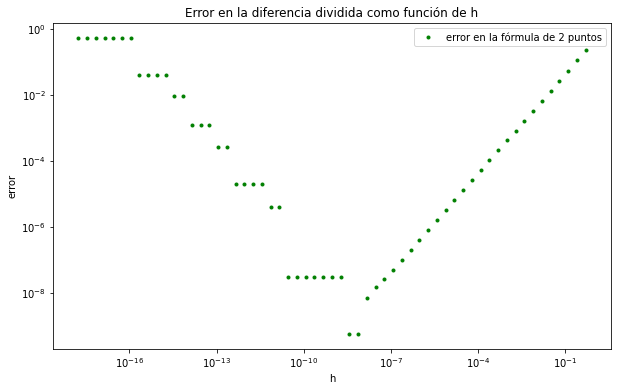

In [24]:
f = np.sin
#Derivada de f
fp = np.cos

x0 = 1
fp0 = fp(x0)

#Usamos valores de h de la forma 1/2^n
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_forward = (f(x0+hs) - f(x0))/hs
errores_2p = np.abs(fd_2p_forward - fp0)

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

Recordamos la expresión que derivamos para el error de truncamiento que comete la diferencia de dos puntos hacia delante:

$$
f'(x) = \frac{f(x + h) - f(x)}{h} - \frac{h}{2}f''(\xi)
$$
para un punto $\xi\in (x, x + h)$.

Dibujamos los errores que comete y los comparamos con la cota del error, usando la aproximación $f''(\xi)\approx f''(x)$.

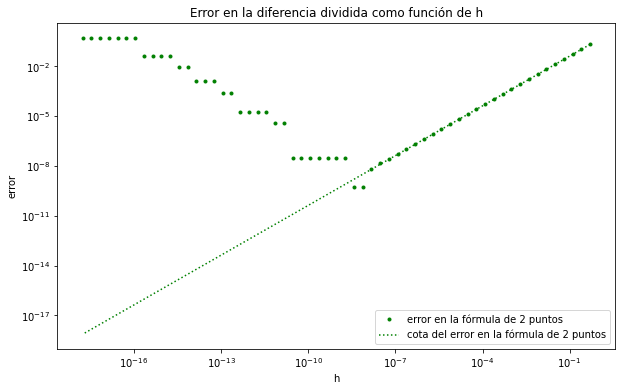

In [25]:
f = np.sin
#Derivada de f
fp = np.cos
#Segunda derivada de f
fp2 = lambda x:-np.sin(x)

x0 = 1
fp0 = fp(x0)
#hs  = np.exp(-np.linspace(0,40,100))
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_forward = (f(x0+hs) - f(x0))/hs
errores_2p = np.abs(fd_2p_forward - fp0)
cota_error_2p = np.abs(fp2(x0))*hs/2

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_2p, 'g:', label='cota del error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

Recordamos que si incorporamos el error de redondeo, obtenemos una cota mejor

$$
\left|f'(x) - \frac{f(x + h) - f(x)}{h}\right| < \frac{\varepsilon}{h} + \frac{h}{2}M
$$
donde $\varepsilon$ es una cota del error de redondeo al evaluar $f$, que estimamos como el epsilon de la máquina (aunque para algunas funciones puede ser demasiado optimista), y $M$ es una cota para $|f''(\xi)|$ cuando $\xi\in (x, x + h)$.

In [26]:
eps=np.finfo(float).eps
eps

2.220446049250313e-16

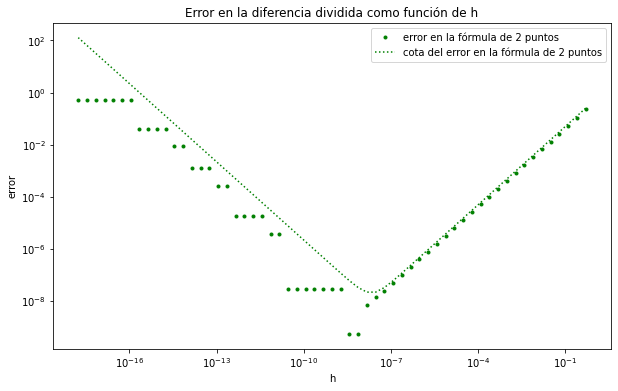

In [27]:
f = np.sin
fp = np.cos
fp2 = lambda x:-np.sin(x)
x0 = 1

fp0 = fp(x0)
#hs  = np.exp(-np.linspace(0,40,100))
hs = np.array([2.0**(-n) for n in range(1, 60)])
fd_2p_forward = (f(x0+hs) - f(x0))/hs
errores_2p = np.abs(fd_2p_forward - fp0)

M = 1
# Si cambias x0, o f, es necesario cambiar la cota M
# la línea siguiente estima M como el máximo entre
# |fp2(x0)| y |fp2(x0+h)|
#M = np.maximum(np.abs(fp2(x0)), np.abs(fp2(x0+hs)))
eps=np.finfo(float).eps
cota_error_2p = eps/hs + M*hs/2

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de h')
plt.loglog(hs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.loglog(hs, cota_error_2p, 'g:', label='cota del error en la fórmula de 2 puntos')
plt.xlabel("h")
plt.ylabel("error")
plt.legend()

### Ejercicio

 - Dibuja en la misma gráfica ``loglog`` los errores que cometen la aproximación a $f'$ de dos puntos hacia delante, y la aproximación centrada de tres puntos.
 - Compara el error que comete la aproximación centrada de tres puntos con la cota del error que vimos en clase:
$$
\left|f'(x) - \frac{f(x + h) - f(x-h)}{2h}\right| < \frac{\varepsilon}{h} + \frac{h^2}{6}M
$$
para una cota $M$ de $f^{(3}(\xi)$ con $\xi\in(x-h,x+h)$.

Ahora hacemos otro tipo de gráfica: dejamos $h$ fijo (no demasiado pequeño) y cambiamos $x$.

Dibujamos los errores que comete y los comparamos con la cota del error:
$$
f'(x) = \frac{f(x + h) - f(x)}{h} - \frac{h}{2}f''(\xi)
$$
para un punto $\xi\in (x, x + h)$, usando la aproximación $f''(\xi)\approx f''(x)$.

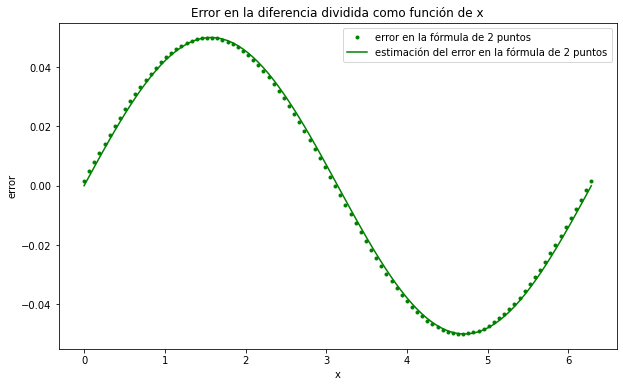

In [28]:
f = np.sin
fp = np.cos
fp2 = lambda x:-np.sin(x)

xs = np.linspace(0,2*np.pi,100)
fps = fp(xs)
h = 0.1
fd_2p_forward = (f(xs + h) - f(xs))/h
errores_2p = fps - fd_2p_forward
cota_error_2p = - (h/2)*fp2(xs)

plt.figure(figsize=(10,6))
plt.title('Error en la diferencia dividida como función de x')
plt.plot(xs, errores_2p, 'g.', label='error en la fórmula de 2 puntos')
plt.plot(xs, cota_error_2p, 'g-', label='estimación del error en la fórmula de 2 puntos')
plt.xlabel("x")
plt.ylabel("error")
plt.legend()

### Ejercicio

 - Repite la gráfica anterior para otra función distinta
 - Repite la gráfica anterior para la diferencia centrada de dos puntos, con su estimación del error.


### Ejercicio
Recuerda la fórmula de tres puntos siguiente aproxima la segunda derivada de una función:

$$
f''(x_0)\approx\frac{f(x_0-h)-2f(x_0)+f(x_0+h)}{h^2}
$$

 - Dibuja el error que comete esta expresión al aproximar $f''$ para $f(x)=\sin(x)$ con valores de $h$ de la forma $1/2^n$, al igual que hicimos antes con la primera derivada.
 - Compara la gráfica anterior con la cota de error
 
$$
\left|f''(x) - \frac{f(x + h) - 2f(x) +f(x-h)}{h^2}\right| < \frac{\varepsilon}{h^2} + \frac{h^2}{24}M
$$

para una cota $M$ de $f^{(4}(\xi)$ con $\xi\in(x-h,x+h)$.